# Human Evaluation (W4)

This notebook consolidates human scores from `docs/human_eval_template.csv`.

Steps:
1) Fill the CSV with scores (1–5).
2) Run the cells below to compute summaries and visuals.

Notes:
- If plots do not render, install dependencies: `pip install pandas matplotlib`.


In [1]:
#pip install pandas matplotlib

## Example fill (optional)

If the CSV is empty, you can add a few example scores to make plots render.
**Replace these with real human scores.**


In [2]:
# Optional: write a few example scores if the CSV is empty
# Set WRITE_BACK = True to overwrite the CSV file.
WRITE_BACK = False

from pathlib import Path

import pandas as pd

if "csv_path" not in globals():
    csv_path = Path("../docs/human_eval_template.csv")

if "score_fields" not in globals():
    score_fields = [
        "coherence_1_5",
        "creativity_1_5",
        "faithfulness_1_5",
        "overall_1_5",
    ]

if "scores_df" not in globals():
    scores_df = pd.read_csv(csv_path)
    for field in score_fields:
        scores_df[field] = pd.to_numeric(scores_df[field], errors="coerce")

if not scores_df[score_fields].notna().any().any():
    demo = scores_df.copy()
    demo_examples = [
        {"coherence_1_5": 3, "creativity_1_5": 3, "faithfulness_1_5": 3, "overall_1_5": 3},
        {"coherence_1_5": 4, "creativity_1_5": 3, "faithfulness_1_5": 4, "overall_1_5": 4},
        {"coherence_1_5": 2, "creativity_1_5": 3, "faithfulness_1_5": 2, "overall_1_5": 2},
    ]
    for i, ex in enumerate(demo_examples):
        if i >= len(demo):
            break
        for key, value in ex.items():
            demo.at[i, key] = value
        demo.at[i, "notes"] = demo.at[i, "notes"] or "example - replace"
        demo.at[i, "evaluator"] = demo.at[i, "evaluator"] or "example"

    if WRITE_BACK:
        demo.to_csv(csv_path, index=False)
        print("Wrote example scores to CSV. Replace them with real ratings.")
    else:
        demo.head(3)
else:
    print("Scores already present; skipping demo fill.")

Scores already present; skipping demo fill.


## How to fill with real human scores

1) Open `docs/human_eval_template.csv` in Excel or Google Sheets.
2) For each prompt, read baseline vs tuned responses.
3) Fill scores (1–5) in: `coherence_1_5`, `creativity_1_5`, `faithfulness_1_5`, `overall_1_5`.
4) Add short notes, evaluator name, and date.

Data volume matters:
- The evaluation is more reliable with many scored prompts.
- Aim for dozens to hundreds of rows (and ideally multiple evaluators).

If multiple evaluators score the same prompts, keep separate copies and merge later
(using the evaluator column to track who scored what).


In [3]:
# Show rows still missing at least one score
missing_mask = scores_df[score_fields].isna().any(axis=1)
missing_count = int(missing_mask.sum())
print("Rows missing any score:", missing_count)

scores_df.loc[missing_mask, ["prompt", "baseline_response", "tuned_response"]].head(5)

Rows missing any score: 46


,prompt,baseline_response,tuned_response
3,Once upon a time there was a little girl who l...,Once upon a time there was a little girl who l...,Once upon a time there was a little girl who l...
4,"One day, a small boy called Sam found a kite i...","One day, a small boy called Sam found a kite i...","One day, a small boy called Sam found a kite i..."
5,"Once upon a time, there was a little girl name...","Once upon a time, there was a little girl name...","Once upon a time, there was a little girl name..."
6,"Once upon a time, there was a little girl call...","Once upon a time, there was a little girl call...","Once upon a time, there was a little girl call..."
7,Once there was a small tank. It was filled wit...,Once there was a small tank. It was filled wit...,Once there was a small tank. It was filled wit...


In [4]:
# Detect whether scores are present
scores_available = scores_df[score_fields].notna().any().any()
if not scores_available:
    print(
        "No scores found yet. Fill at least a few values in coherence_1_5, "
        "creativity_1_5, faithfulness_1_5, and overall_1_5, then re-run the notebook."
    )

In [5]:
from pathlib import Path

import pandas as pd

csv_path = Path("../docs/human_eval_template.csv")
print("CSV:", csv_path.resolve())

score_fields = [
    "coherence_1_5",
    "creativity_1_5",
    "faithfulness_1_5",
    "overall_1_5",
]

# Load data
scores_df = pd.read_csv(csv_path)
print("Rows:", len(scores_df))

# Coerce score columns to numeric
for field in score_fields:
    scores_df[field] = pd.to_numeric(scores_df[field], errors="coerce")

# Quick preview
scores_df.head(3)

CSV: C:\Users\gemim\OneDrive\Bureau\M1-cours-Data engineer\MSC 1 AI\Semestre 2\Foundations of machine learning and datascience\Project\docs\human_eval_template.csv
Rows: 49


,prompt,baseline_response,tuned_response,coherence_1_5,creativity_1_5,faithfulness_1_5,overall_1_5,notes,evaluator,date
0,"Once upon a time, there was a girl named Ali. ...","Once upon a time, there was a girl named Ali. ...","Once upon a time, there was a girl named Ali. ...",3.0,3.0,3.0,3.0,example - replace,example,NaN
1,Once upon a time there was a bald man. He want...,Once upon a time there was a bald man. He want...,Once upon a time there was a bald man. He want...,4.0,3.0,4.0,4.0,example - replace,example,NaN
2,"Once upon a time, there was a little boy named...","Once upon a time, there was a little boy named...","Once upon a time, there was a little boy named...",2.0,3.0,2.0,2.0,example - replace,example,NaN


In [6]:
# Summary statistics per score field
summary_rows = []
for field in score_fields:
    series = scores_df[field].dropna()
    summary_rows.append(
        {
            "metric": field,
            "count": int(series.count()),
            "mean": round(series.mean(), 2) if not series.empty else None,
            "median": round(series.median(), 2) if not series.empty else None,
            "min": round(series.min(), 2) if not series.empty else None,
            "max": round(series.max(), 2) if not series.empty else None,
        }
    )

summary_df = pd.DataFrame(summary_rows)
summary_df

,metric,count,mean,median,min,max
0,coherence_1_5,3,3.0,3.0,2.0,4.0
1,creativity_1_5,3,3.0,3.0,3.0,3.0
2,faithfulness_1_5,3,3.0,3.0,2.0,4.0
3,overall_1_5,3,3.0,3.0,2.0,4.0


In [7]:
# Overall score by evaluator (if provided)
if "evaluator" in scores_df.columns:
    evaluator_df = (
        scores_df.groupby(scores_df["evaluator"].fillna("(unknown)"))["overall_1_5"]
        .agg(["count", "mean"])
        .sort_values("mean", ascending=False)
    )
    evaluator_df
else:
    print("No evaluator column in CSV.")

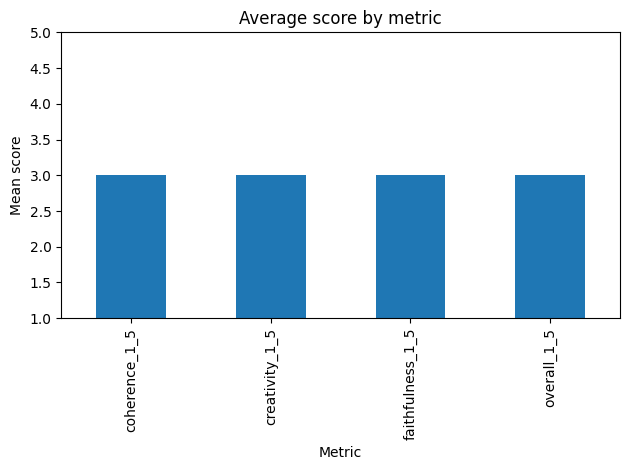

In [8]:
import matplotlib.pyplot as plt

# Bar chart of mean scores
means = summary_df.set_index("metric")["mean"].dropna()
if not means.empty:
    ax = means.plot(kind="bar", title="Average score by metric", ylim=(1, 5))
    ax.set_xlabel("Metric")
    ax.set_ylabel("Mean score")
    plt.tight_layout()
    plt.show()
else:
    print("No scores yet to plot.")

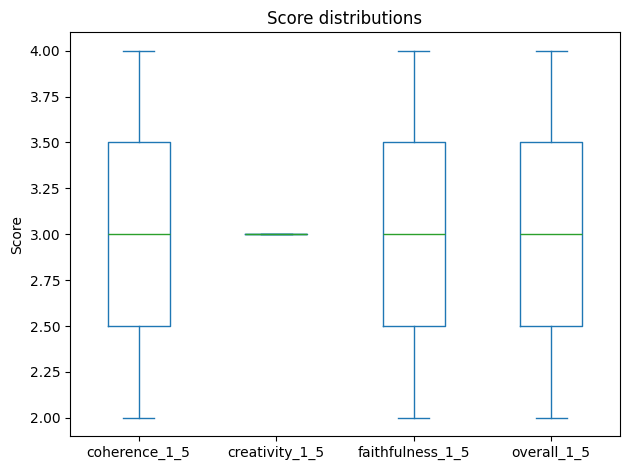

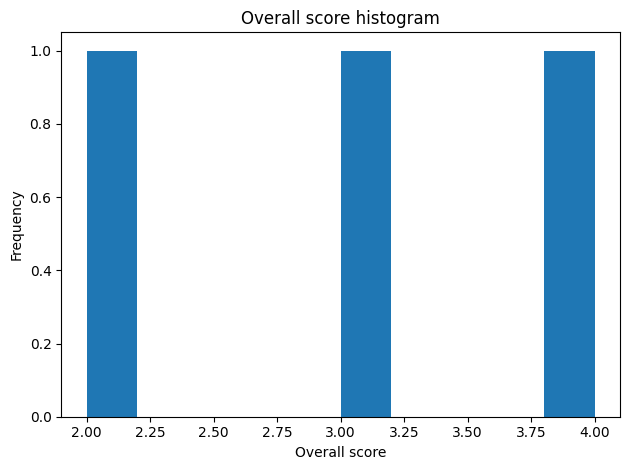

In [9]:
# Distribution plots (boxplot + histogram)
plot_df = scores_df[score_fields].dropna(how="all")
if not plot_df.empty:
    ax = plot_df.plot(kind="box", title="Score distributions")
    ax.set_ylabel("Score")
    plt.tight_layout()
    plt.show()

    overall_series = scores_df["overall_1_5"].dropna()
    if not overall_series.empty:
        ax = overall_series.plot(kind="hist", bins=10, title="Overall score histogram")
        ax.set_xlabel("Overall score")
        plt.tight_layout()
        plt.show()
else:
    print("No scores yet to plot.")

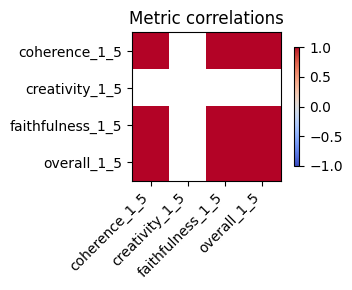

In [10]:
# Correlation heatmap between metrics
corr = scores_df[score_fields].corr()
if corr.notna().any().any():
    fig, ax = plt.subplots(figsize=(4, 3))
    cax = ax.imshow(corr, vmin=-1, vmax=1, cmap="coolwarm")
    ax.set_xticks(range(len(score_fields)))
    ax.set_xticklabels(score_fields, rotation=45, ha="right")
    ax.set_yticks(range(len(score_fields)))
    ax.set_yticklabels(score_fields)
    fig.colorbar(cax, ax=ax, shrink=0.8)
    ax.set_title("Metric correlations")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data to compute correlations.")

## Interpretation guide

Use the visuals and tables above to write your report:
- Compare means across metrics to spot strengths/weaknesses.
- Inspect the boxplot for variability and outliers.
- Use the histogram to assess overall score concentration.
- Check correlations to see if metrics move together.

If scores are missing, ask evaluators to complete the CSV before summarizing.
